In [1]:
import numpy as np
from scipy.stats import norm, expon, chi2, uniform
import matplotlib.pyplot as plt
%matplotlib inline

# Standard distributions sampling
## Ex 1.
Use scipy to take samples from the following distributions:
1. Normal distribution with $\mu$=1 and $\sigma$=4,
2. Exponential distribution with $\lambda = \dfrac{1}{4}$,
3. Chi-squared distribution with 8 degrees of freedom,
4. Uniform distribution with borders [$-2\sqrt{3}, 6\sqrt{3}$].

Compare their theoretical and sample distribution, mean and variance.

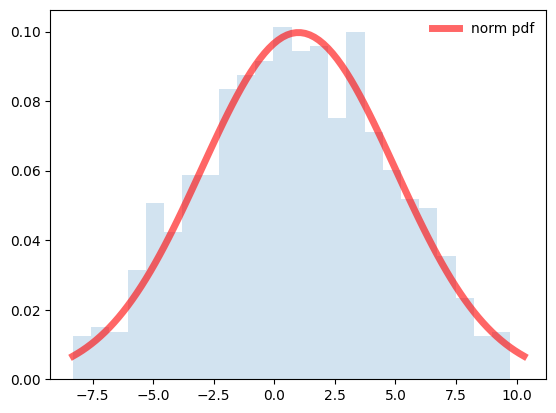

Distribution mean: 1.0
Distribution variance: 16.0
Sample mean: 0.8929272747876017
Sample variance: 17.186227686788335


In [2]:
#1. Normal
#This one I'll do for you :-)

rv_norm = norm(loc = 1, scale = 4)
x = np.linspace(rv_norm.ppf(0.01), rv_norm.ppf(0.99), 100)
fig, ax = plt.subplots(1, 1)
ax.plot(x, rv_norm.pdf(x), 'r-', lw=5, alpha=0.6, label='norm pdf')
r = rv_norm.rvs(size=1000)
ax.hist(r, density=True, histtype='stepfilled', alpha=0.2, bins = x[::4])


ax.legend(loc='best', frameon=False)
plt.show()

print("Distribution mean: {0}".format(rv_norm.stats(moments='m')))
print("Distribution variance: {0}".format(rv_norm.stats(moments='v')))
print("Sample mean: {0}".format(np.mean(r)))
print("Sample variance: {0}".format(np.var(r)))

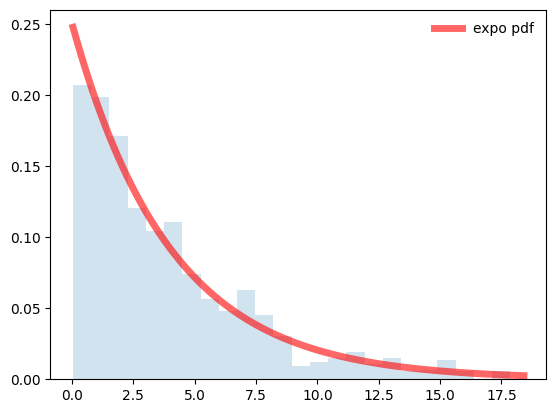

Distribution mean: 4.0
Distribution variance: 16.0
Sample mean: 4.0937205180325815
Sample variance: 16.27144368831378


In [3]:
#Exponential
#here goes your code

rv_expon = expon(scale = 4)
x = np.linspace(rv_expon.ppf(0.01), rv_expon.ppf(0.99), 100)
fig, ax = plt.subplots(1, 1)
ax.plot(x, rv_expon.pdf(x), 'r-', lw=5, alpha=0.6, label='expo pdf')
r = rv_expon.rvs(size=1000)
ax.hist(r, density=True, histtype='stepfilled', alpha=0.2, bins = x[::4])

ax.legend(loc='best', frameon=False)
plt.show()

print("Distribution mean: {0}".format(rv_expon.stats(moments='m')))
print("Distribution variance: {0}".format(rv_expon.stats(moments='v')))
print("Sample mean: {0}".format(np.mean(r)))
print("Sample variance: {0}".format(np.var(r)))

#hint: expon

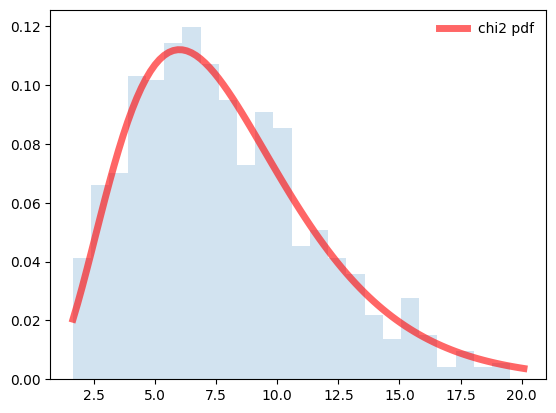

Distribution mean: 8.0
Distribution variance: 16.0
Sample mean: 7.959759185236701
Sample variance: 16.358564035146017


In [4]:
#chi2
#here goes your code

rv_chi2 = chi2(df=8)
x = np.linspace(rv_chi2.ppf(0.01), rv_chi2.ppf(0.99), 100)
fig, ax = plt.subplots(1, 1)
ax.plot(x, rv_chi2.pdf(x), 'r-', lw=5, alpha=0.6, label='chi2 pdf')
r = rv_chi2.rvs(size=1000)
ax.hist(r, density=True, histtype='stepfilled', alpha=0.2, bins = x[::4])

ax.legend(loc='best', frameon=False)
plt.show()

print("Distribution mean: {0}".format(rv_chi2.stats(moments='m')))
print("Distribution variance: {0}".format(rv_chi2.stats(moments='v')))
print("Sample mean: {0}".format(np.mean(r)))
print("Sample variance: {0}".format(np.var(r)))

#hint: chi2

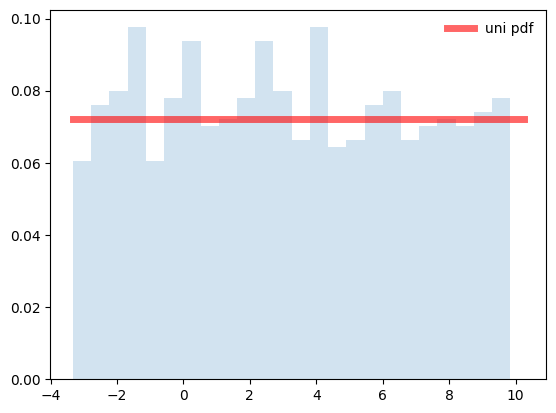

Distribution mean: 3.4641016151377544
Distribution variance: 15.999999999999998
Sample mean: 3.5559723026262704
Sample variance: 16.196741309606388


In [5]:
#uniform

#here goes your code

rv_uni = uniform(loc=-2 * (3 ** 0.5), scale=8 * (3 ** 0.5))
x = np.linspace(rv_uni.ppf(0.01), rv_uni.ppf(0.99), 100)
fig, ax = plt.subplots(1, 1)
ax.plot(x, rv_uni.pdf(x), 'r-', lw=5, alpha=0.6, label='uni pdf')
r = rv_uni.rvs(size=1000)
ax.hist(r, density=True, histtype='stepfilled', alpha=0.2, bins = x[::4])

ax.legend(loc='best', frameon=False)
plt.show()

print("Distribution mean: {0}".format(rv_uni.stats(moments='m')))
print("Distribution variance: {0}".format(rv_uni.stats(moments='v')))
print("Sample mean: {0}".format(np.mean(r)))
print("Sample variance: {0}".format(np.var(r)))

#hint: uniform

# Low of large numbers. Central Limit Theorem.
## Ex 2.
a) For N from 2 to 1000 draw N samples from distributions defined in Ex 1. Plot sample variance and mean against the size of the sample. 

[0.0,
 40.0,
 Text(0.5, 0, 'samples size'),
 Text(0, 0.5, 'variance'),
 0.0,
 40.0,
 Text(0.5, 0, 'samples size'),
 Text(0, 0.5, 'variance'),
 0.0,
 40.0,
 Text(0.5, 0, 'samples size'),
 Text(0, 0.5, 'variance'),
 0.0,
 40.0,
 Text(0.5, 0, 'samples size'),
 Text(0, 0.5, 'variance')]

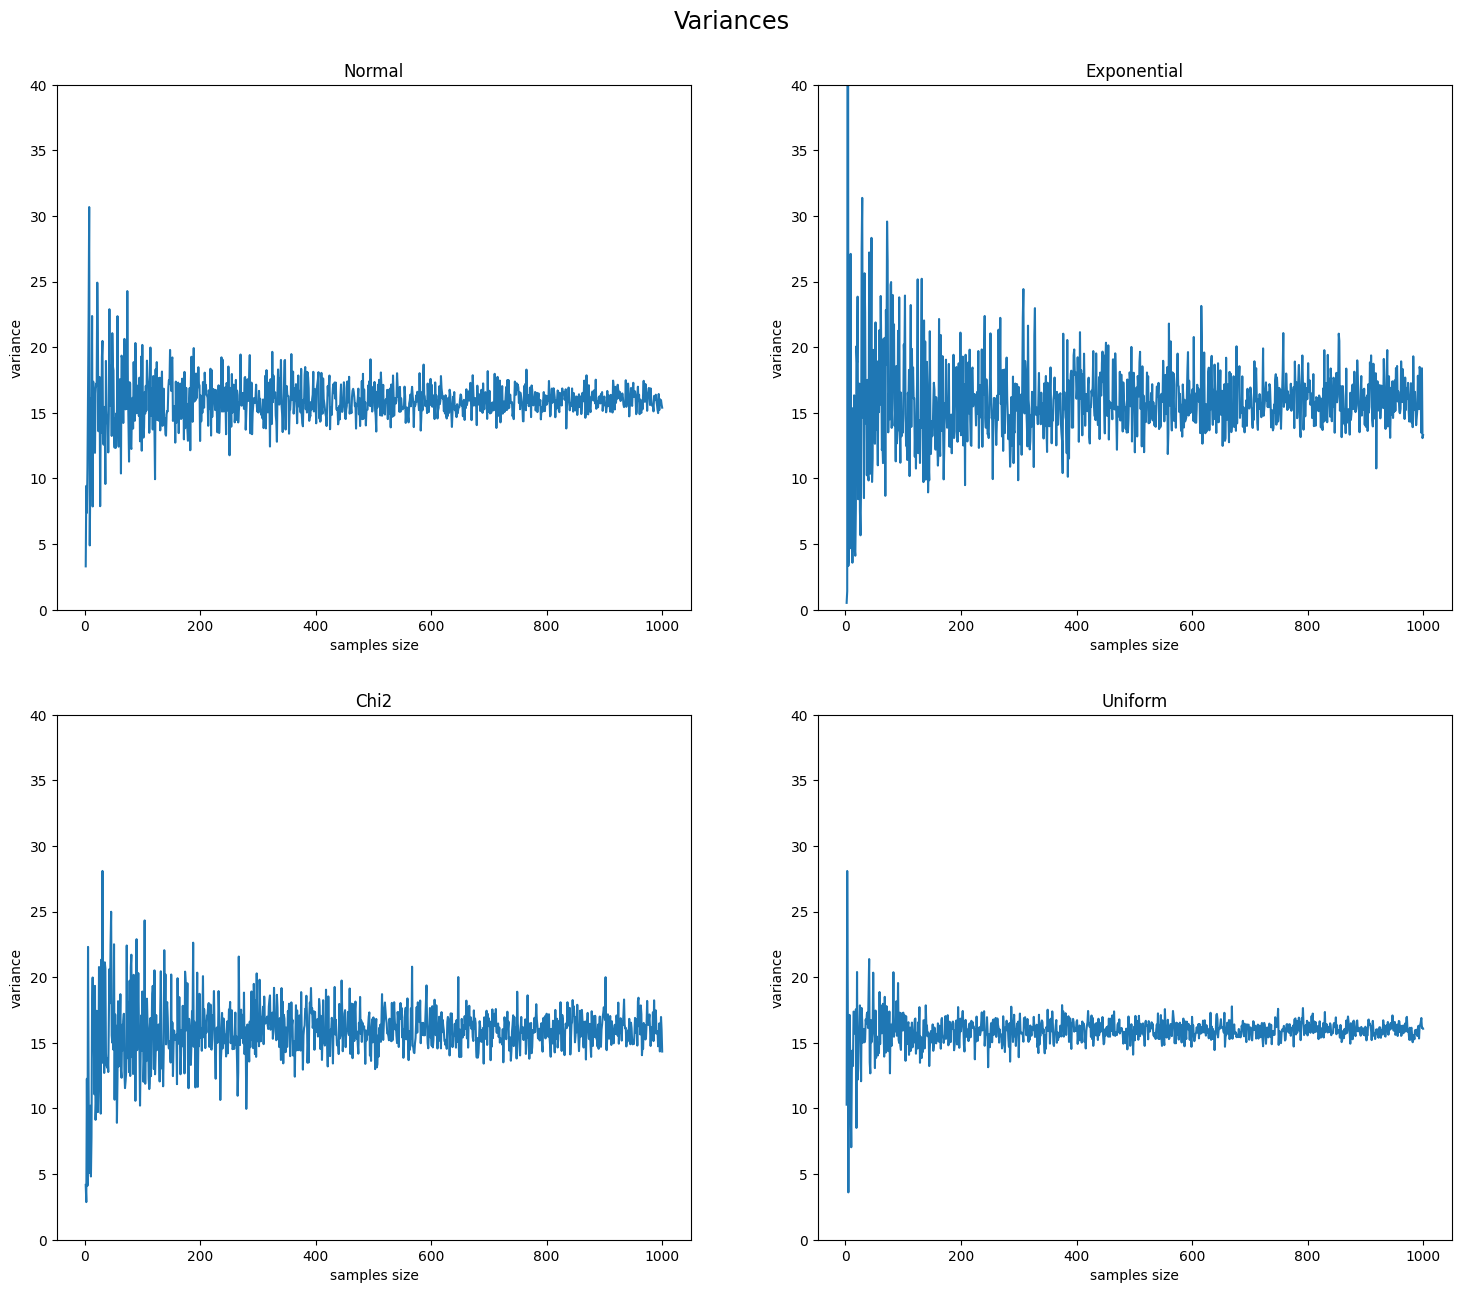

In [6]:
#here goes your code
fig, ax = plt.subplots(2,2, figsize=(18,15))
samples = list(range(2, 1001))
variance = [[], [], [], []]

rv_norm = norm(loc = 1, scale = 4)
rv_expon = expon(scale = 4)
rv_chi2 = chi2(df=8)
rv_uni = uniform(loc=-2 * (3 ** 0.5), scale=8 * (3 ** 0.5))

rv = [rv_norm, rv_expon, rv_chi2, rv_uni]

for i in range(999):
  for j in range(4):
    r = rv[j].rvs(size=samples[i])
    variance[j].append(np.var(r))

fig.suptitle('Variances', y=0.93, size='xx-large')

ax[0][0].plot(samples, variance[0])
ax[0][0].title.set_text('Normal')
ax[0][1].plot(samples, variance[1])
ax[0][1].title.set_text('Exponential')
ax[1][0].plot(samples, variance[2])
ax[1][0].title.set_text('Chi2')
ax[1][1].plot(samples, variance[3])
ax[1][1].title.set_text('Uniform')

plt.setp(ax, ylim=([0,40]), xlabel='samples size', ylabel='variance')

[Text(0.5, 0, 'samples size'),
 Text(0, 0.5, 'mean'),
 Text(0.5, 0, 'samples size'),
 Text(0, 0.5, 'mean'),
 Text(0.5, 0, 'samples size'),
 Text(0, 0.5, 'mean'),
 Text(0.5, 0, 'samples size'),
 Text(0, 0.5, 'mean')]

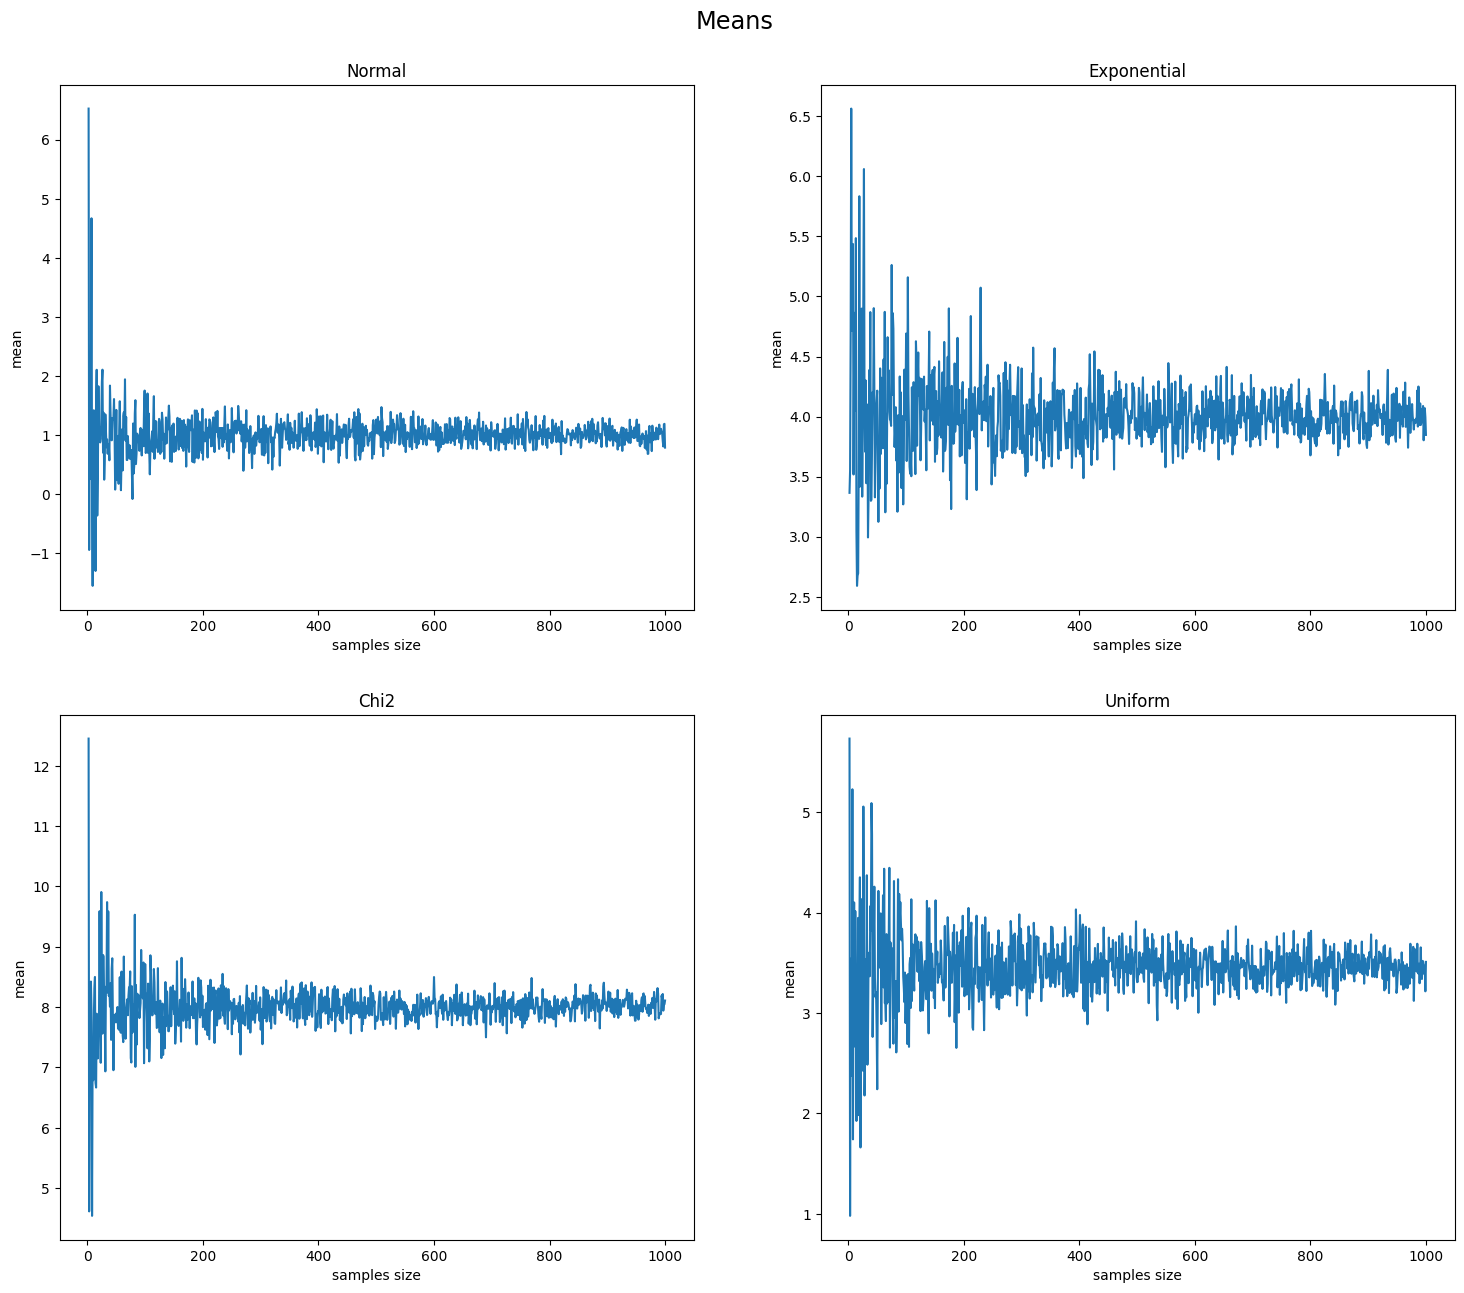

In [7]:
fig, ax = plt.subplots(2, 2, figsize=(18,15))
samples = list(range(2, 1001))
mean = [[], [], [], []]

rv_norm = norm(loc = 1, scale = 4)
rv_expon = expon(scale = 4)
rv_chi2 = chi2(df=8)
rv_uni = uniform(loc=-2 * (3 ** 0.5), scale=8 * (3 ** 0.5))

rv = [rv_norm, rv_expon, rv_chi2, rv_uni]

for i in range(999):
  for j in range(4):
    r = rv[j].rvs(size=samples[i])
    mean[j].append(np.mean(r))

fig.suptitle('Means', y=0.93, size='xx-large')

ax[0][0].plot(samples, mean[0])
ax[0][0].title.set_text('Normal')
ax[0][1].plot(samples, mean[1])
ax[0][1].title.set_text('Exponential')
ax[1][0].plot(samples, mean[2])
ax[1][0].title.set_text('Chi2')
ax[1][1].plot(samples, mean[3])
ax[1][1].title.set_text('Uniform')

plt.setp(ax, xlabel='samples size', ylabel='mean')

## Ex 3.
For N=1,4,9,16 draw histograms of an average over N samples taken from distributions defined in Ex 1. 

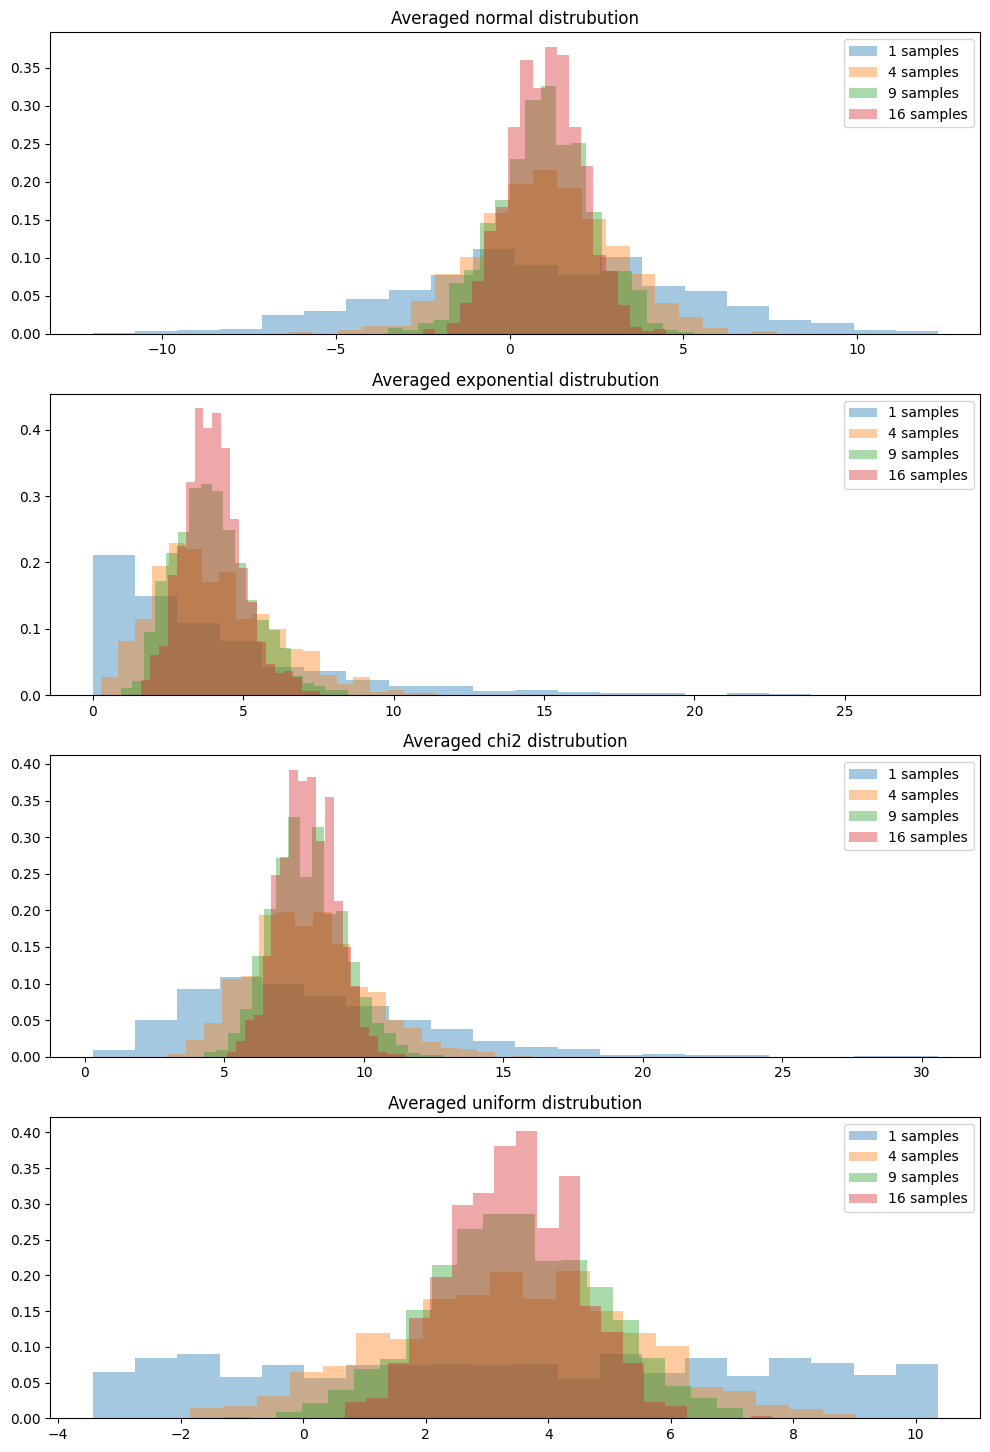

In [8]:
#here goes your code

fig, ax = plt.subplots(4, 1, figsize = (12, 18))
samples = [1, 4, 9, 16]
rv_list = [rv_norm, rv_expon, rv_chi2, rv_uni]
rv_titles = ['normal', 'exponential', 'chi2', 'uniform']

index = 0
for rv in rv_list:
  r = []
  x = np.linspace(rv.ppf(0.01), rv.ppf(0.99), 100)
  ax[index].set_title(f'Averaged {rv_titles[index]} distrubution')

  for i in range(1, samples[-1] + 1):
    r.append(rv.rvs(size = 1000))

    if i in samples:
      plot = np.average(np.array(r).reshape(-1, 1000), axis = 0)
      ax[index].hist(plot, density = True, histtype = 'stepfilled', alpha = 0.4, bins = 20, label = f'{i} samples')
      ax[index].legend()

  index += 1


# Arbitrary distribution sampling

Sometimes it may happen, that we need to sample from a custom distribution, not implemented in any standard library. There exist a simple algorithm for such sampling, provided that the distribution is bounded (pdf has finite support and maximum).


#### Accept-rejection sampling
Let the distribution be given by the pdf $g(x)$ and defined at interval $[a,b]$. In addition, let $M$ be the supremum of $g(x)$.

1. Take a sample $t$ from the uniform distribution at the interval $[a,b]$,
2. Take a sample $u$ from the uniform distribution at the interval $[0,M]$,
3. If $g(t) > u$ we accept $t$ as a sample taken from the original distribution. If not, we go back to 1.

## Ex 4. 
Implement function accept_rejection_sampling(dist, size = 1) which samples from any bounded distribution on the [0,1] interval.

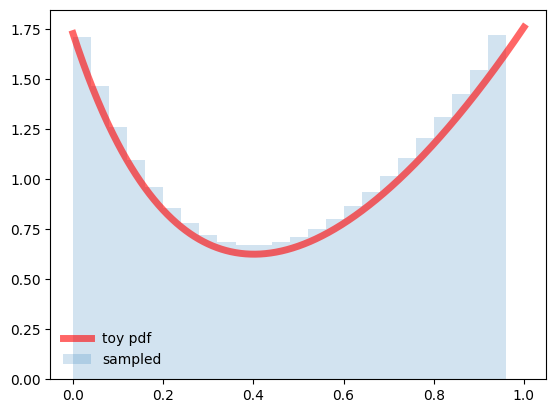

In [9]:
def toy_dist(x):
    C = 1/3 - np.exp(-4)/4 + 1/4
    return (x**2 + np.exp(-4*x)) / C 

x = np.linspace(0,1,1000)

def accept_rejection_sampling(dist, size = 1):
    #here goes your code
    sup = max(toy_dist(dist))
    sup_interval = np.linspace(0, sup, size)
    samples = []

    for t in x:
      for u in sup_interval:
        if toy_dist(t) > u:
          samples.append(t)
        else:
          break

    return samples

samples = accept_rejection_sampling(toy_dist(x), size = 10000)

fig, ax = plt.subplots(1, 1)
ax.plot(x, toy_dist(x), 'r-', lw=5, alpha=0.6, label='toy pdf')
ax.hist(samples, density=True, histtype='stepfilled', alpha=0.2, bins = x[::40], label = "sampled")
ax.legend(loc='best', frameon=False)
plt.show()

# Probability space matters!
## Ex 5
Sample 2000 points from the unit disk. Do it in following ways:
1. Assume uniform distribution of radius (0,1) and argument (0,2$\pi$),  
2. Assume uniform distribution of x and y coordinate (-1,1). Drop values laying outside of the disk.   
Explain differences. between 1. and 2. Then:
3. Modify the solution of point 1. by changing the distribution of the radius in such a way, that we result in 2D distribution from 2.

Text(0, 0.5, 'count')

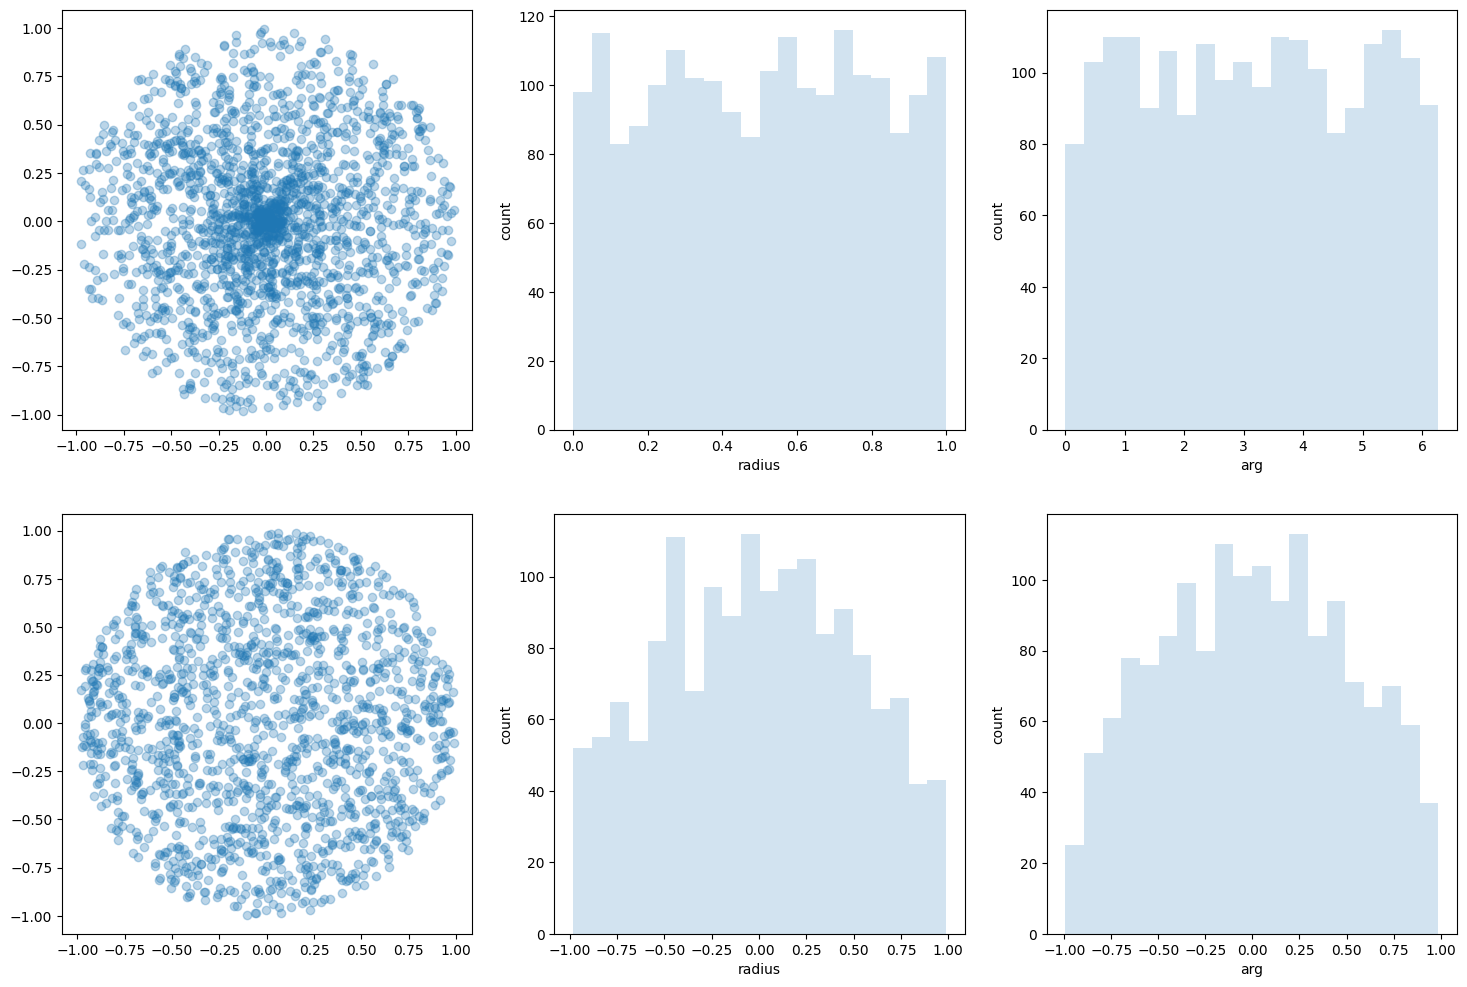

In [10]:
#Version1
#here goes your code

fig, ax = plt.subplots(2, 3, figsize = (18, 12))

uni_rad = uniform(loc = 0, scale = 1)
uni_arg = uniform(loc = 0, scale = 2 * np.pi)

sample_rad = uni_rad.rvs(size = 2000)
sample_arg = uni_arg.rvs(size = 2000)
x = sample_rad * np.sin(sample_arg)
y = sample_rad * np.cos(sample_arg)

ax[0][0].scatter(x, y, alpha = 0.3)

ax[0][1].hist(sample_rad, histtype='stepfilled', alpha=0.2, bins = 20)
ax[0][1].set_xlabel('radius')
ax[0][1].set_ylabel('count')

ax[0][2].hist(sample_arg, histtype='stepfilled', alpha=0.2, bins = 20)
ax[0][2].set_xlabel('arg')
ax[0][2].set_ylabel('count')

#Version2
#here goes your code

def drop_outside(x, y):
  x_result = []
  y_result = []

  for a, b in zip(x, y):
    if a ** 2 + b ** 2 <= 1:
      x_result.append(a)
      y_result.append(b)

  return x_result, y_result

uni_rad = uniform(loc = -1, scale = 2)
uni_arg = uniform(loc = 0, scale = 2 * np.pi)

x, y = drop_outside(uni_rad.rvs(size = 2000), uni_rad.rvs(size = 2000))

ax[1][0].scatter(x, y, alpha = 0.3)

ax[1][1].hist(x, histtype='stepfilled', alpha=0.2, bins = 20)
ax[1][1].set_xlabel('radius')
ax[1][1].set_ylabel('count')

ax[1][2].hist(y, histtype='stepfilled', alpha=0.2, bins = 20)
ax[1][2].set_xlabel('arg')
ax[1][2].set_ylabel('count')


Text(0, 0.5, 'count')

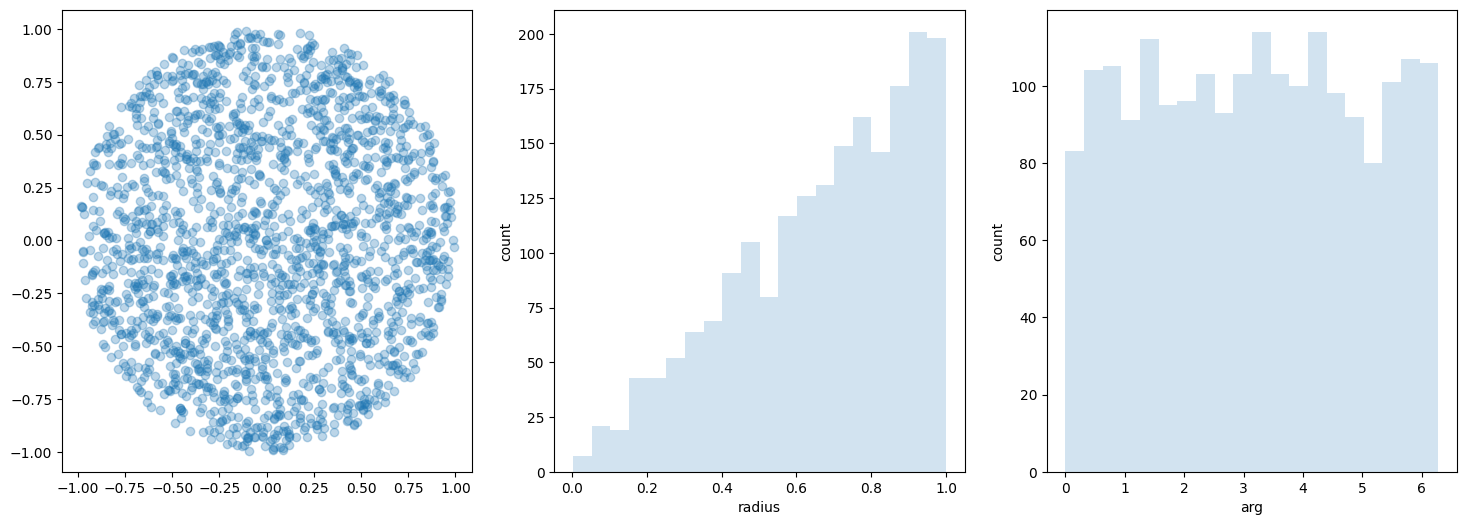

In [12]:
#Version3
#here goes your code

fig, ax = plt.subplots(1, 3, figsize = (18, 6))

uni_rad = uniform(loc = 0, scale = 1)
uni_arg = uniform(loc = 0, scale = 2 * np.pi)

sample_rad = np.sqrt(1 - uni_rad.rvs(size = 2000))
sample_arg = uni_arg.rvs(size = 2000)
x = sample_rad * np.sin(sample_arg)
y = sample_rad * np.cos(sample_arg)

ax[0].scatter(x, y, alpha = 0.3)

ax[1].hist(sample_rad, histtype='stepfilled', alpha=0.2, bins = 20)
ax[1].set_xlabel('radius')
ax[1].set_ylabel('count')

ax[2].hist(sample_arg, histtype='stepfilled', alpha=0.2, bins = 20)
ax[2].set_xlabel('arg')
ax[2].set_ylabel('count')

## Application: Laplace equation, Dirichlet boundary conditions

#### Monte-Carlo procedure for solving 2D Laplace equation with Dirichlet boundary conditions
1. Start in a random position inside the boundaries,
2. With an equal probability move up/down/right/left until you hit the boundary,
3. After hitting the boundary we take the value $v_{b}$ of the function in the hitting point. We update the values of all points along the just finished random walk using the formula:
$$ v_{new} = \dfrac{nv_{old} + v_{b}}{n+1}, $$
where $n$ is a number of random walks which have already passed through this point.
4. Finish if the desired precision is achieved. If not, go back to 1.


A theory behind the above procedure can be found here:
https://www.uzh.ch/cmsssl/physik/dam/jcr:d559688c-1e7f-44ca-9fbe-aab0755c0b6e/empp18_MC_Markov.pdf

## Ex 6
Implement the method described above and solve numerically given Dirichlet problem. Plot few intermediate steps.

In [ ]:
S = 10 # Decrease if computations take too long
plane = np.zeros((S,S))
plane_counts = np.zeros((S,S))
plane[0] = np.cos(np.linspace(-1.5,1.5,S)*2*np.pi)
plane[-1] = -np.cos(np.linspace(-1,1,S)*2*np.pi)
plane[ : , 0] = np.cos(np.linspace(-0.5,0.5,S)*2*np.pi)
plane[ : , -1] = -2+np.linspace(-1,1,S)**2
# print(np.cos(np.linspace(-0.5,0.5,S)*2*np.pi))
# print(plane)

[-1.         -0.76604444 -0.17364818  0.5         0.93969262  0.93969262
  0.5        -0.17364818 -0.76604444 -1.        ]
[[-1.          0.5         0.5        -1.          0.5         0.5
  -1.          0.5         0.5        -1.        ]
 [-0.76604444  0.          0.          0.          0.          0.
   0.          0.          0.         -1.39506173]
 [-0.17364818  0.          0.          0.          0.          0.
   0.          0.          0.         -1.69135802]
 [ 0.5         0.          0.          0.          0.          0.
   0.          0.          0.         -1.88888889]
 [ 0.93969262  0.          0.          0.          0.          0.
   0.          0.          0.         -1.98765432]
 [ 0.93969262  0.          0.          0.          0.          0.
   0.          0.          0.         -1.98765432]
 [ 0.5         0.          0.          0.          0.          0.
   0.          0.          0.         -1.88888889]
 [-0.17364818  0.          0.          0.          0.    

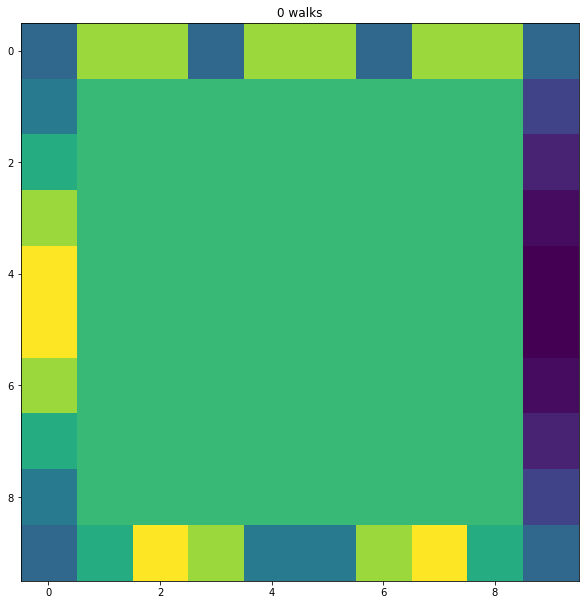

In [ ]:
plt.figure(figsize=(10,15))
plt.title("0 walks")
plt.imshow(plane)

In [ ]:
#here goes your code

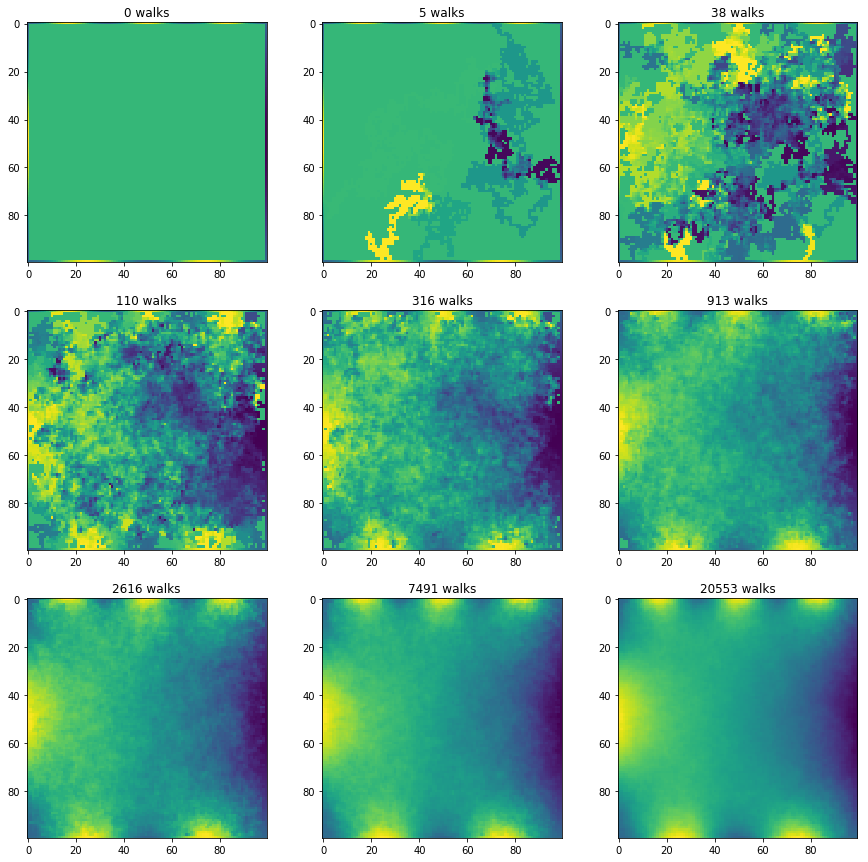

In [ ]:
#Animation code for testing purposes. May not work on your machine.


%matplotlib qt

import matplotlib.animation as animation 

fig = plt.figure()
plt.title("0 walks")
im = plt.imshow(planes[0])
im.set_array(planes[0])

# function to update figure
def updatefig(j):
    # set the data in the axesimage object
    im.set_array(planes[j])
    plt.title("{0} walks".format(walks[j]))
    return [im]
# kick off the animation
ani = animation.FuncAnimation(fig, updatefig, frames=range(1000), interval=1000)
plt.show()